In [ ]:
#to import libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#data reading for naming reference

In [127]:
titanic_data = pd.read_csv('titanic.csv')

In [128]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#exploratory data analysis
#identifying and counting missing data

In [129]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#using visualisations to show the number of null values

<AxesSubplot:>

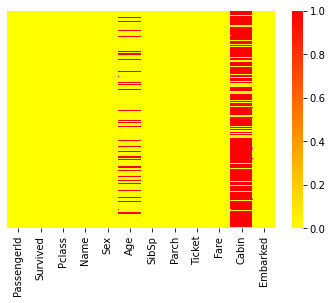

In [13]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=True,cmap='autumn_r')

In [ ]:
#An estimated of 20 percent of the age data is missing. The proportion of age missing is likely small enough for reasonable replacement
#with some form of imputation. However, at the column label 'Cabin', the number of missing data is large enough which needs to be dropped or cleaned. 

In [ ]:
#count of people who survived using countplot according to gender

In [146]:
titanic_data['Sex'].value_counts().head() # to count number of passengers per sex

male      577
female    314
Name: Sex, dtype: int64

In [148]:
titanic_data['Survived'].value_counts().head() # to count number of survivors

0    549
1    342
Name: Survived, dtype: int64

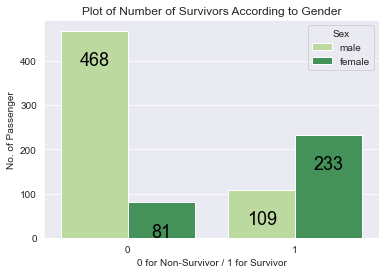

In [147]:
x = sns.set_style('darkgrid')
x = sns.countplot(x='Survived',hue='Sex',data=titanic_data,palette='YlGn')
x.set_ylabel('No. of Passenger', fontsize = 10)
x.set_xlabel('0 for Non-Survivor / 1 for Survivor', fontsize = 10)
x.set(title= 'Plot of Number of Survivors According to Gender')
for p in x.patches:
    x.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()  

In [39]:
#count of people who survived using countplot according to class of passenger

In [133]:
titanic_data['Pclass'].value_counts().head() # to count number of passengers per class

3    491
1    216
2    184
Name: Pclass, dtype: int64

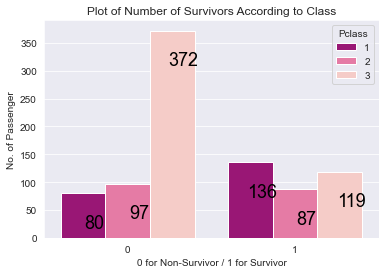

In [145]:
s = sns.set_style('darkgrid')
s = sns.countplot(x='Survived',hue='Pclass',data=titanic_data,palette='RdPu_r')
s.set_ylabel('No. of Passenger', fontsize = 10)
s.set_xlabel('0 for Non-Survivor / 1 for Survivor', fontsize = 10)
s.set(title= 'Plot of Number of Survivors According to Class')
for p in s.patches:
    s.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()       

In [ ]:
#count of people who survived using countplot according to different parameters
#but first, check the data distribution of age since there were null values

<AxesSubplot:xlabel='Age', ylabel='Density'>

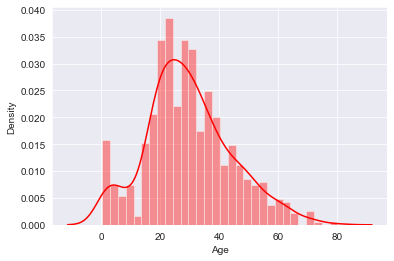

In [157]:
sns.distplot(titanic_data['Age'].dropna(),kde=True,color='red',bins=30)

In [162]:
titanic_data['Age'].mean() # to get the mean of age

29.69911764705882

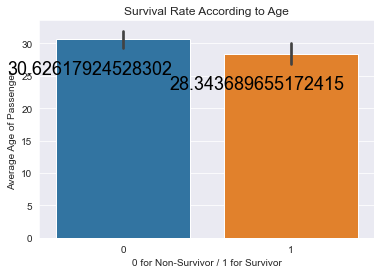

In [160]:
m = sns.barplot(x = "Survived", y = "Age", data = titanic_data)
m.set_ylabel('Average Age of Passenger', fontsize = 10)
m.set_xlabel('0 for Non-Survivor / 1 for Survivor', fontsize = 10)
m.set(title= 'Survival Rate According to Age')
for p in m.patches:
    m.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()       

In [ ]:
#count of people who survived using countplot according to sibling plus spouse

In [163]:
titanic_data['SibSp'].value_counts().head() # to count number of passengers per status

0    608
1    209
2     28
4     18
3     16
Name: SibSp, dtype: int64

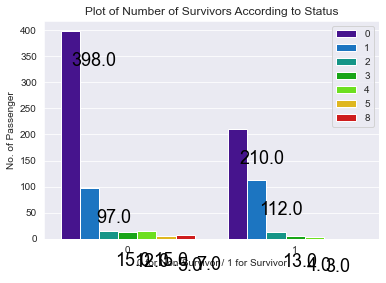

In [167]:
l = sns.set_style('darkgrid')
l = sns.countplot(x='Survived',hue='SibSp',data=titanic_data,palette='nipy_spectral')
l.set_ylabel('No. of Passenger', fontsize = 10)
l.set_xlabel('0 for Non-Survivor / 1 for Survivor', fontsize = 10)
l.set(title= 'Plot of Number of Survivors According to Status')
plt.legend(loc=1)
for p in l.patches:
    l.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()   

In [ ]:
#survival rate in relation to age and Pclass

Text(0, 0.5, 'Age of Passenger')

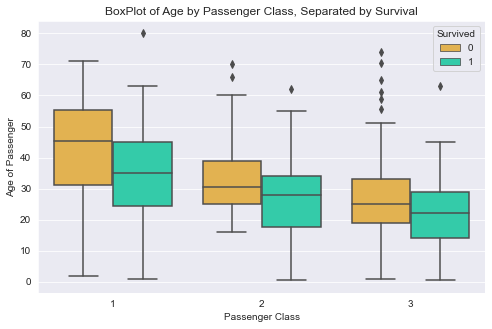

In [116]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=titanic_data,hue='Survived',palette='turbo_r')
plt.title("BoxPlot of Age by Passenger Class, Separated by Survival")
plt.xlabel('Passenger Class')
plt.ylabel('Age of Passenger')

In [ ]:
#survival rate in relation to Gender and Age

Text(0, 0.5, 'Age of Passenger')

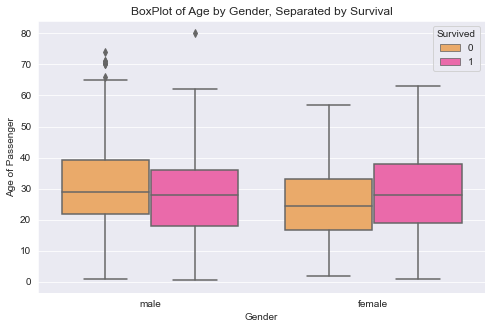

In [174]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Sex',y='Age',data=titanic_data,hue='Survived',palette='spring_r')
plt.title("BoxPlot of Age by Gender, Separated by Survival")
plt.xlabel('Gender')
plt.ylabel('Age of Passenger') 

In [ ]:
#survival rate in relation to Sex and Class

Text(0, 0.5, 'Portion of Class')

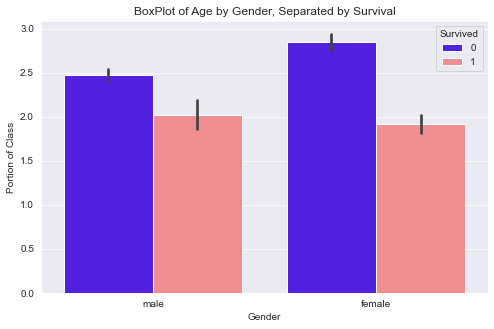

In [169]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex',y='Pclass',data=titanic_data,hue='Survived',palette='gnuplot2')
plt.title("BoxPlot of Age by Gender, Separated by Survival")
plt.xlabel('Gender')
plt.ylabel('Portion of Class')